In [148]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [149]:
program_code_1HT = """ 
data {
  int<lower=0> hits; 
  int<lower=0> misses;
  int<lower=0> false_alarms; 
  int<lower=0> correct_rejections; 
  int<lower=0> n_old; 
  int<lower=0> n_new; 
}
parameters {
  real<lower=0,upper=1> d; // probability of detecting an old item
  real<lower=0,upper=1> g; // probability of guessing an item as old
}
model {
  // Priors
    d ~ beta(2, 2); 
    g ~ beta(2, 2); 
  
  // Likelihood
    hits ~ binomial(n_old, d); 
    misses ~ binomial(n_old, 1 - d);
    false_alarms ~ binomial(n_new, g); 
    correct_rejections ~ binomial(n_new, 1 - g); 
  }
"""

In [150]:
#Original List: Drum, Curtain, Bell, Coffee, School, Parent, Moon, Garden, Hat, Farmer, Nose, Turkey, Color, House, River, Desk, Ranger, Mountain, Glasses, Towel
#Modified List:     , Curtain, Bell,       , School, Parent,     , Garden,    ,       , Nose,       , Color,      , River,     ,       , Mountain,        , Towel

stan_dict = {
    'hits' : 7,
    'misses' : 3 ,
    'false_alarms' : 0,
    'correct_rejections' : 10,
    'n_old':20,
    'n_new':20
}

posterior = stan.build(program_code_1HT, data=stan_dict,random_seed=42)

fit = posterior.sample(num_chains=2,num_samples=2500,num_warmup = 1000)

Building...



Building: found in cache, done.Messages from stanc:
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!


In [151]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
d,0.591,0.073,0.459,0.732,0.001,0.001,4775.0,3329.0,1.0
g,0.274,0.067,0.151,0.400,0.001,0.001,4658.0,3358.0,1.0


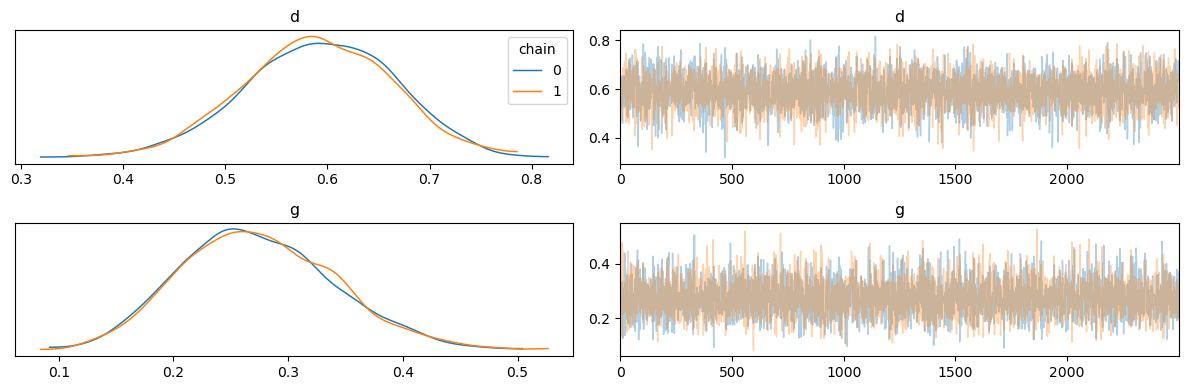

In [152]:
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()

In [153]:
program_code_2HT = """
data {
  int<lower=0> N_old; // Number of old items
  int<lower=0> N_new; // Number of new items
  int<lower=0, upper=N_old> X_old_old; // Number of old items identified as old
  int<lower=0, upper=N_old> X_old_new; // Number of old items identified as new
  int<lower=0, upper=N_new> X_new_old; // Number of new items identified as old
  int<lower=0, upper=N_new> X_new_new; // Number of new items identified as new
}

parameters {
  real<lower=0, upper=1> d; // Detection probability
  real<lower=0, upper=1> g; // Guessing probability
}

model {
  // Priors (Uniform priors are implicitly defined by the parameter bounds)
  
  // Likelihood for old items
  X_old_old ~ binomial(N_old, d + ((1-d) *g ));
  X_old_new ~ binomial(N_old, (1 - d) * (1-g));
  
  // Likelihood for new items
  X_new_old ~ binomial(N_new, (1-d) * g);
  X_new_new ~ binomial(N_new, (1 - d) * (1 - g));
}
"""

In [154]:

stan_dict = {
    'N_old' : 20,
    'N_new' : 20,
    'X_old_old': 7,
    'X_old_new' : 0,
    'X_new_old': 3, 
    'X_new_new': 10
}

posterior = stan.build(program_code_2HT, data=stan_dict,random_seed=42)

fit = posterior.sample(num_chains=2,num_samples=2500,num_warmup = 1000)

Building...



Building: found in cache, done.Messages from stanc:
Sampling:   0%
Sampling:  50% (3500/7000)
Sampling: 100% (7000/7000)
Sampling: 100% (7000/7000), done.
Messages received during sampling:
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000307 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.07 seconds.
  Adjust your expectations accordingly!


In [155]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
d,0.449,0.101,0.261,0.634,0.002,0.002,2207.0,2026.0,1.0
g,0.299,0.099,0.115,0.480,0.002,0.002,2054.0,1984.0,1.0


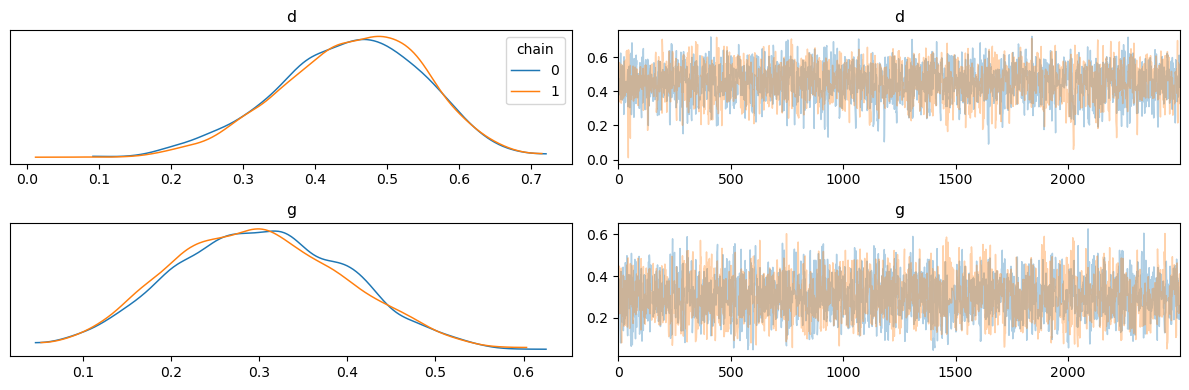

In [156]:
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()